In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
def remove_prefix(text, prefix):
    if text.startswith(prefix):
        return text[len(prefix):]
    return text

def read_map_file(filename):
    dataframe = pd.DataFrame(columns=('method', 'find_start', 'find_end', 'sate_size_items', 'state_size_windows', 'cumulative_merge', 'cumulative_add', 'cumulative_evict', 'cumulative_report', 'cumulative_emit', 'emit_start', 'emit_end', 'evict_start', 'evict_end'))
    
    data = {}
    prefix_to_remove = "method=processElement "
    prefix_to_remove2 = "method=onEventTime "
    with open(filename, 'r') as file:
        for line in file:
            fields = line.split(',')
            for field in fields:
                if field.startswith('method=processElement '):
                    field_spaced = remove_prefix(field,prefix_to_remove).strip()
                    key,value = field_spaced.split('=')
                    data[key] = int(value)
                    data['method'] = "processElement"
                elif field.startswith('method=onEventTime '):
                    field_spaced = remove_prefix(field,prefix_to_remove2).strip()
                    key,value = field_spaced.split('=')
                    data[key] = int(value)
                    data['method'] = "onEventTime"
                else: 
                    if len(field.split(' '))>1:
                        field = field.split(' ')[0]
                    field_spaced = field.strip()
                    key,value = field_spaced.split('=')
                    data[key] = int(value)
            dataframe.loc[len(dataframe)] = data
    return dataframe

In [53]:
df = read_map_file('./metrics-sample')


%matplotlib inline

In [54]:
df

,method,find_start,find_end,sate_size_items,state_size_windows,cumulative_merge,cumulative_add,cumulative_evict,cumulative_report,cumulative_emit,emit_start,emit_end,evict_start,evict_end
0,processElement,428676333187583,428676353251292,1,1,1596042,68333,112750,86292,6882625,NaN,NaN,NaN,NaN
1,processElement,428676387317708,428676388379792,2,1,1345875,7917,3500,1250,139792,NaN,NaN,NaN,NaN
2,processElement,428676390270500,428676390636750,3,1,101042,4250,2583,666,40209,NaN,NaN,NaN,NaN
3,processElement,428676390894125,428676390923542,4,1,22042,2917,1750,625,29125,NaN,NaN,NaN,NaN
4,processElement,428676391056583,428676391085333,5,1,20625,3125,1666,500,27833,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,processElement,428676640346667,428676640351583,43,1,3833,208,125,84,8166,4.286766e+14,NaN,4.286766e+14,4.286766e+14
770,processElement,428676640378708,428676640383292,44,1,3833,167,125,83,8250,4.286766e+14,NaN,4.286766e+14,4.286766e+14
771,processElement,428676640410500,428676640415125,45,1,7250,208,125,84,8625,4.286766e+14,NaN,4.286766e+14,4.286766e+14
772,processElement,428676640446250,428676640451042,46,1,3833,208,125,83,8583,4.286766e+14,NaN,4.286766e+14,4.286766e+14


In [55]:
df['cumulative_scope'] = df['find_end']-df['find_start']

In [56]:
d1 = df[['sate_size_items','cumulative_add']]

In [57]:
d1 = d1.groupby('sate_size_items')['cumulative_add'].mean().reset_index()

In [58]:
d1

,sate_size_items,cumulative_add
0,1,68333.000000
1,2,7917.000000
2,3,4250.000000
3,4,2917.000000
4,5,3125.000000
5,6,2458.000000
6,7,5561.066667
7,8,972.133333
8,9,922.200000
9,10,880.600000


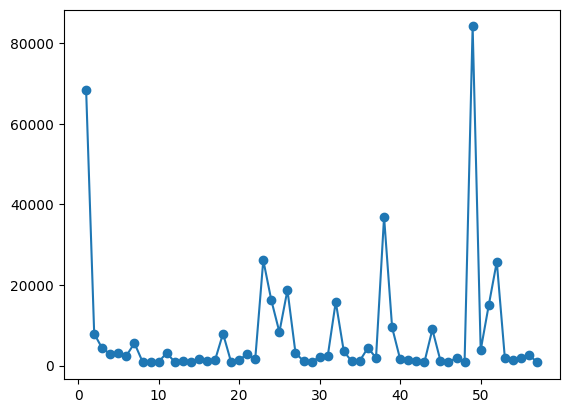

In [59]:
 plt.plot(d1['sate_size_items'], d1['cumulative_add'], marker='o')

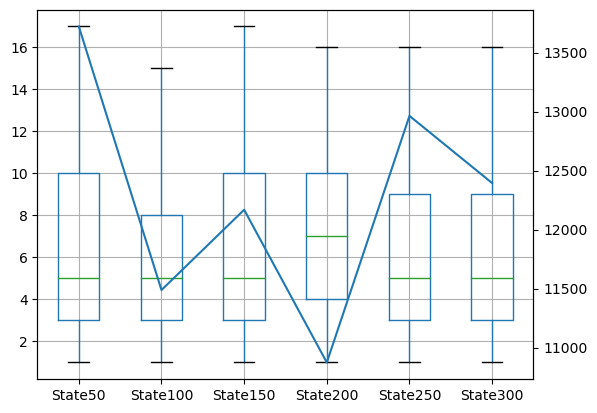

In [150]:
mean = result['Latency'].mean()
mean.index = np.arange(1,len(mean)+1)

_, ax = plt.subplots()

result[['State50','State100','State150','State200','State250','State300']].boxplot(showfliers=False, ax=ax)

mean.plot(ax=ax, secondary_y=True)

plt.savefig('SUMtests.png')
plt.show()


In [153]:
result.mean()

State50         6.575958
Latency     13720.706271
State100        6.003700
Latency     11488.141014
State150        6.446145
Latency     12168.401940
State200        7.036104
Latency     10874.517052
State250        6.156816
Latency     12963.543354
State300        6.178218
Latency     12394.144414
dtype: float64

['SUM50', 'SUM100', 'SUM150', 'SUM200', 'SUM250']

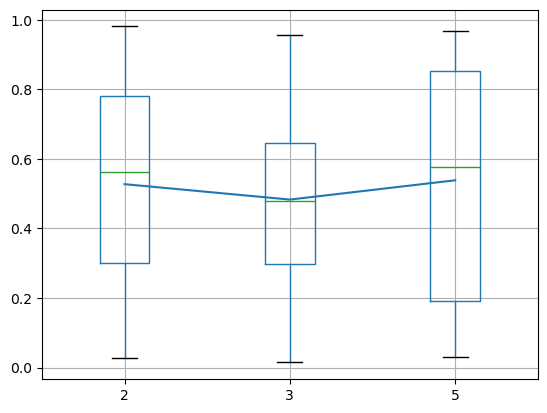

In [144]:
test_errors_dict = dict()
np.random.seed(40)

test_errors_dict[2] = np.random.rand(20)
test_errors_dict[3] = np.random.rand(20)
test_errors_dict[5] = np.random.rand(20)

df = pd.DataFrame(data=test_errors_dict)
df = df.astype(float)

mean = df.mean()
mean.index = np.arange(1,len(mean)+1)

_, ax = plt.subplots()
mean.plot(ax=ax)
df.boxplot(showfliers=False, ax=ax)

plt.show()

In [123]:
["SUM"+str(50*(i+1)) for i in range(len(mean))]

['SUM50', 'SUM100', 'SUM150', 'SUM200', 'SUM250', 'SUM300']